#Exercise 1 Classification
##Classifiers
(1) k-NN  
(2) Logistic Regression Classifier  
(3) Bayes Classifier  
(4) Support Vector Machines  
(5) Decision Trees  
(6) Artificial Neural Networks
##Performance Measures  
(1) Confusion Matrix  
(2）Precision and Recall  
(3) Cross Validation  
(4) F-1 score  
(5) ROC curve


## notes
align all the parameters to play with in the comments   
**train/test split section**








#Section 0 Warming up

## Setup


In [2]:
import cv2
import numpy as np
import random
import pandas as pd
import io
import matplotlib.pyplot as plt
from google.colab import files

# Fix random seeds so that the results will be reproducible
np.random.seed(1)
random.seed(1)

##Preparing datasets  





###Load built-in datasets from [sklearn](http://scikit-learn.org/)   
*   [MNIST digit dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits)
*   [iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris)  


***Args:***   

*   ***DATA_FLAG***:  *flag to toggle datasets, e.g."iris","mnist", (default: "iris")* 

In [3]:
from sklearn.datasets import fetch_openml
from sklearn.datasets import load_iris

DATA_FLAG = "iris"                                                               # use the iris dataset as the default dataset

mnist = fetch_openml('mnist_784', version=1, return_X_y=True)                    # The MNIST data consists of 28x28 pixel digits, leading to 784 features
iris = load_iris()                                                               # The iris data consists of 3 classes, each has 4 features

datasets = {}                                                                    # integrate all datasets into one variable

datasets['iris'] = {}                                                            # add iris dataset
datasets['iris']['X'], datasets['iris']['y'] = iris.data, iris.target
datasets['iris']['feature_names'] = iris['feature_names']
datasets['iris']['target_names'] = iris['target_names']

datasets['mnist'] = {}                                                           # add mnist dataset
datasets['mnist']['X'], datasets['mnist']['y']= mnist

###Load external dataset
*   [loan.csv](https://www.dropbox.com/s/2wr7a07644qvd8y/loan.csv?raw=1)   
*   [loan-normalized.csv](https://www.dropbox.com/s/ccl6tcsv1kme06b/loan-normalized.csv?raw=1)   
*   [bayes-onefeature.csv](https://www.dropbox.com/s/nlyku5o8895c9gp/bayes-onefeature.csv?raw=1)   
*   [bayes-twofeatures.csv](https://www.dropbox.com/s/rvr6n9krj5asp5u/bayes-twofeatures.csv?raw=1)   
*   [play.csv](https://www.dropbox.com/s/7jvw7y0zlhzaes9/play.csv?raw=1)

###Please DO NOT change the ulrs below 

In [4]:
###### Please DO NOT change the ulrs below #####
url1 = "https://www.dropbox.com/s/2wr7a07644qvd8y/loan.csv?raw=1"
url2 = "https://www.dropbox.com/s/ccl6tcsv1kme06b/loan-normalized.csv?raw=1"
url3 = "https://www.dropbox.com/s/nlyku5o8895c9gp/bayes-onefeature.csv?raw=1"
url4 = "https://www.dropbox.com/s/rvr6n9krj5asp5u/bayes-twofeatures.csv?raw=1"
url5 = "https://www.dropbox.com/s/7jvw7y0zlhzaes9/play.csv?raw=1"


df1 = pd.read_csv(url1)
df2 = pd.read_csv(url2)
df3 = pd.read_csv(url3)
df4 = pd.read_csv(url4)
df5 = pd.read_csv(url5)

datasets['loan'] = {}                                                            # add loan.csv dataset
datasets['loan']['X'] = np.hstack((np.array(df1['Age']).reshape(-1, 1),  
                                   np.array(df1['Loan']).reshape(-1, 1)))
datasets['loan']['y'] = np.array(df1['Default'])

datasets['loan_normalized'] = {}                                                 # add loan_normalize.csv dataset
datasets['loan_normalized']['X'] = np.hstack((np.array(df2['Age']).reshape(-1, 1),  
                                   np.array(df2['Loan']).reshape(-1, 1)))
datasets['loan_normalized']['y'] = np.array(df2['Default'])

datasets['bayes-onefeature'] = {}                                                # add bayes-onefeature.csv dataset
datasets['bayes-onefeature']['X'] = np.array(df3['Weather']).reshape(-1, 1)
datasets['bayes-onefeature']['y'] = np.array(df3['Play'])

datasets['bayes-twofeatures'] = {}                                              # add bayes-twofeatures.csv dataset
datasets['bayes-twofeatures']['X'] = np.hstack((np.array(df4['Weather']).reshape(-1, 1),  
                                   np.array(df4['Wind']).reshape(-1, 1)))
datasets['bayes-twofeatures']['y'] = np.array(df4['Play'])

datasets['play'] = {}                                                            # add play.csv dataset
datasets['play']['X'] = np.hstack((np.array(df5['outlook']).reshape(-1, 1),  
                                   np.array(df5['temp']).reshape(-1, 1),
                                   np.array(df5['humidity']).reshape(-1, 1),
                                   np.array(df5['windy']).reshape(-1, 1)))
datasets['play']['y'] = np.array(df5['play'])
datasets['play']['feature_names'] = np.array(['outlook', 'temp', 'humidity', 'windy'])
datasets['play']['target_names'] = np.array(['yes', 'no'])

In [ ]:
# check the dimensions of features and labels
# print(datasets['loan']['X'].shape, datasets['loan']['y'].shape)
# print(datasets['loan_normalized']['X'].shape, datasets['loan_normalized']['y'].shape)
# print(datasets['bayes-onefeature']['X'].shape, datasets['bayes-onefeature']['y'].shape)
# print(datasets['bayes-twofeatures']['X'].shape, datasets['bayes-twofeatures']['y'].shape)
# print(datasets['play']['X'].shape, datasets['play']['y'].shape)

(11, 2) (11,)
(11, 2) (11,)
(14, 1) (14,)
(14, 2) (14,)
(14, 4) (14,)


###Take a look at the loaded datasets by toggling the *DATA_FLAG*


*  iris dataset: 
  *  features:  'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'  
  *  classes:  'setosa', 'versicolor', 'virginica'  


*   MNIST dataset:  
![alt text](https://www.dropbox.com/s/kxnu5f9a64vw9t1/mnist.png?raw=1)   



# of samples in the iris dataset:  150
iris features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
iris classes:  ['setosa' 'versicolor' 'virginica']


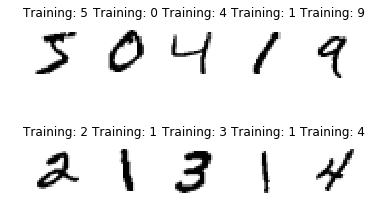

(11, 2) (11,)


In [ ]:
DATA_FLAG = "iris"

X, y = datasets[DATA_FLAG]['X'], datasets[DATA_FLAG]['y']                        # load the default dataset with labels

print('# of samples in the iris dataset: ', len(X))                              # iris data has total 150 samples
print('iris features: ', datasets[DATA_FLAG]['feature_names'])                   # iris data has 4 feature dimensionality  
print('iris classes: ',  datasets[DATA_FLAG]['target_names'])                    # and 3 classes 


DATA_FLAG = "mnist"                                                              # toggle the dataset by re-define the DATA_FLAG

X, y = datasets[DATA_FLAG]['X'], datasets[DATA_FLAG]['y']
images_with_labels = list(zip(X.reshape(-1, 28, 28), y.astype(np.int)))          # reshape the data into 2-D images

# plt.figure()                                                                     
for index, (image, label) in enumerate(images_with_labels[:10]):                 # plot the first 10 samples in MNIST
  plt.subplot(2, 5, index + 1)
  plt.axis('off')
  plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
  plt.title('Training: %i' % label)
plt.show()


DATA_FLAG = "loan"

X, y = datasets[DATA_FLAG]['X'], datasets[DATA_FLAG]['y']
print(X.shape, y.shape)

DATA_FLAG = "iris"                                                               # toggle back to the iris dataset

#Section 1 - Classifiers


##1.1 - k-Nearest Neighbors (k-NN)



###1.1.A - Learn a k-NN classifier to classify [loan.csv](https://www.dropbox.com/s/2wr7a07644qvd8y/loan.csv?dl=0)   
***The code below is  an implementation of the example given in slide 22***  
 ***Args:***   

*   ***DATA_FLAG***:  *flag to toggle datasets, e.g."iris","mnist",  (default: "iris")* 
*   ***k***:  *number of nearest neighbors to query*
*   ***weights:*** *weight function used in prediction. e.g. "distance",  "uniform" , (default: "uniform")*  
*   ***metric:*** *the distance metric to use. e.g. “euclidean”,  “manhattan”,  “minkowski”,  (default: “minkowski”)*  

***Output:***   
*   The predicted label for instance #11:  ['Y']







In [ ]:
# take a look at the dataframe for loan.csv
print(df1)

    Age    Loan Default
0    25   40000       N
1    35   60000       N
2    45   80000       N
3    20   20000       N
4    35  120000       N
5    52   18000       N
6    23   95000       Y
7    40   62000       Y
8    60  100000       Y
9    48  220000       Y
10   33  150000       Y


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

DATA_FLAG = "loan"                                                               # load the loan dataset
# DATA_FLAG = "loan_normalized"

X, y = datasets[DATA_FLAG]['X'], datasets[DATA_FLAG]['y'] 

k = 3                                                                            # number of neighbors to use, feel free to change the value
weights = "distance"                                                             # weight points by the inverse of their distance
metric = "euclidean"                                                             # the distance metric to use


kNN = KNeighborsClassifier(n_neighbors=k, weights = weights, metric = metric)    # build the classifier
kNN.fit(X, y)
print("The predicted label for instance #11: ",  kNN.predict(X[10].reshape(1, -1)))

DATA_FLAG = "iris"

The predicted label for instance #11:  ['Y']


###Learn a k-NN classifier to classify  [iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris)
 ***Args:***   

*   ***DATA_FLAG***:  *flag to toggle datasets, e.g."iris","mnist",  (default: "iris")* 
*   ***k***:  *number of nearest neighbors to query*  
*   ***weights:*** *weight function used in prediction. e.g. "distance",  "uniform" , (default: "uniform")*  
*   ***metric:*** *the distance metric to use. e.g. “euclidean”,  “manhattan”,  “minkowski”,  (default: “minkowski”)*  

***Output:***   
*    *KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean', metric_params=None, n_jobs=None, n_neighbors=15, p=2, weights='distance')*

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

DATA_FLAG = "iris"
X, y = datasets[DATA_FLAG]['X'], datasets[DATA_FLAG]['y']                       
X = X[:, :2]                                                                     # only take the first two features for later visualization

k = 15                                                                           # number of neighbors to use, feel free to change the value
weights = "distance"                                                             # weight points by the inverse of their distance
metric = "euclidean"                                                             # the distance metric to use

kNN = KNeighborsClassifier(n_neighbors=k, weights = weights, metric = metric)      
kNN.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='distance')

### Visulize the decision boundary of the learned k-NN classifier on iris data     

***Output:***   
![alt text](https://www.dropbox.com/s/hy2gekrlww8hnls/kNN_iris.png?raw=1)

Text(0.5, 1.0, "k-NN 3-class classification (k = 15, weights = 'distance', metric = 'euclidean')")

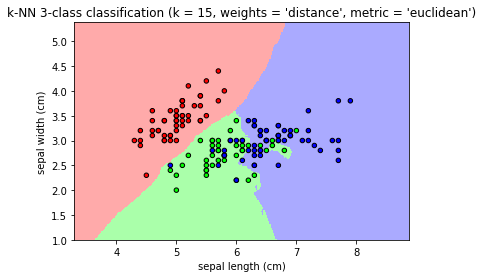

In [ ]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

h = .02                                                                          # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),                                 # Create color maps to each point in the mesh [x_min, x_max] x [y_min, y_max]
                     np.arange(y_min, y_max, h))
Z = kNN.predict(np.c_[xx.ravel(), yy.ravel()])                                   # k-NN prediction color map

Z = Z.reshape(xx.shape)                                   
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.xlabel(datasets[DATA_FLAG]['feature_names'][0])
plt.ylabel(datasets[DATA_FLAG]['feature_names'][1])


plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)          # Plot the data points
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("k-NN 3-class classification (k = %i, weights = '%s', metric = '%s')"
          % (k, weights, metric))

##1.2 - Logistic Regression Classifier

###Learn a  logistic regression classifier to classify   [iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris)  

 ***Args:***   

*   ***DATA_FLAG***:  *flag to toggle datasets, e.g."iris","mnist",  (default: "iris")* 
*   ***C :***  *Inverse of regularization strength; must be a positive float  (default: 1.0)* 
*   ***multi_class:*** *If the option chosen is ‘ovr’, then a binary problem is fit for each label. For ‘multinomial’ the loss minimised is the multinomial loss fit across the entire probability distribution , (default: ‘ovr’)*  
*   ***solver:*** *Algorithm to use in the optimization problem. e.g. ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’,  (default: “liblinear”)*  

***Output:***   
*   *LogisticRegression(C=100000.0, class_weight=None, dual=False, it_intercept=True, intercept_scaling=1, max_iter=100,  multi_class='multinomial', n_jobs=None, penalty='l2',  random_state=None, solver='lbfgs', tol=0.0001, verbose=0,  warm_start=False)*

In [ ]:
from sklearn.linear_model import LogisticRegression

DATA_FLAG = "iris"
X, y = datasets[DATA_FLAG]['X'], datasets[DATA_FLAG]['y']                       
X = X[:, :2]                                                                      # only take the first two features for later visualization

C=1e5
multi_class='multinomial'
solver='lbfgs'

logreg = LogisticRegression(C=C, solver=solver, multi_class=multi_class)         # construct a multi-class Classifier
logreg.fit(X, y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

###Visulize the decision boundary of the learned logistic regression classifier on iris data    
***Output:***     
![alt text](https://www.dropbox.com/s/sbcpwq2xovvwkzv/LR_iris.png?raw=1)  

Text(0.5, 1.0, "Logistic Regression 3-class classification (C = 100000, multi_class = 'multinomial', solver = 'lbfgs')")

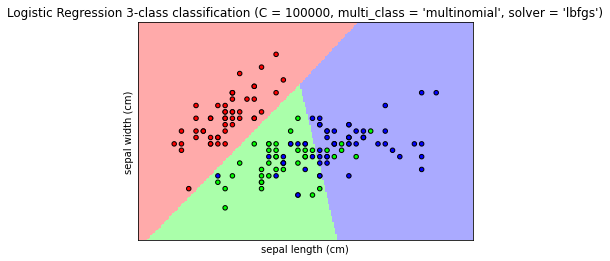

In [ ]:
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

h = .02                                                                           # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),                                  # Create color maps to each point in the mesh [x_min, x_max] x [y_min, y_max]
                     np.arange(y_min, y_max, h))

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])                                 # logistic regression prediction color map

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)           # Plot also the training points
plt.xlabel(datasets[DATA_FLAG]['feature_names'][0])
plt.ylabel(datasets[DATA_FLAG]['feature_names'][1])

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.title("Logistic Regression 3-class classification (C = %i, multi_class = '%s', solver = '%s')"
          % (C, multi_class, solver)) 

##1.3 - Bayes Classifier  


###1.3.A - Learn a Bayes classifier to classify [bayes-twofeatures.csv](https://www.dropbox.com/s/rvr6n9krj5asp5u/bayes-twofeatures.csv?raw=1)   
***The code below is  an implementation of the example given in slide 31***   
 ***Args:***   

*   ***DATA_FLAG***:  *flag to toggle datasets, e.g."iris","mnist",  (default: "iris")* 
*   ***priors***:  *Prior probabilities of the classes, (default: "None")* 
*   ***var_smoothing:*** *Portion of the largest variance of all features that is added to variances for calculation stability, (default=1e-9)*    

***Output:***   
*   bayes classifier predictions:  'No' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'No'  
*  1 mislabeled points out of a total 14 points


In [ ]:
# take a look at the dataframe for bayes-twofeatures.csv
print(df4)

     Weather      Wind Play
0      sunny    strong   No
1   overcast      weak  Yes
2      rainy  moderate  Yes
3      sunny      weak  Yes
4      sunny      weak  Yes
5   overcast      weak  Yes
6      rainy    strong   No
7      rainy    strong   No
8      sunny      weak  Yes
9      rainy      weak  Yes
10     sunny    strong   No
11  overcast      weak  Yes
12  overcast      weak  Yes
13     rainy  moderate   No


In [ ]:
from sklearn.naive_bayes import CategoricalNB

from sklearn import preprocessing
DATA_FLAG = "bayes-twofeatures"                                                  # load the bayes-twofeatures dataset
# DATA_FLAG = "bayes-onefeature"

X, y = datasets[DATA_FLAG]['X'], datasets[DATA_FLAG]['y'] 
X_Encode = np.zeros_like(X)

le_list = []
for col in range(X.shape[1]):
  le_list.append(preprocessing.LabelEncoder())
  le_list[col].fit(X[:,col]) 
  X_Encode[:,col] = le_list[col].transform(X[:,col])                             # Encode characteristic features to float numbers 
# print(X_Encode)

NB = CategoricalNB(alpha=0.0001)                           # The likelihood of the features is assumed to be Gaussian
NB.fit(X_Encode, y)

y_pred = NB.predict(X_Encode)
print("bayes classifier predictions: ",  y_pred)
print(" %d mislabeled points out of a total %d points"
      % ((y!=y_pred).sum(), X.shape[0]))
DATA_FLAG = "iris"  

bayes classifier predictions:  ['No' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'Yes'
 'No']
 1 mislabeled points out of a total 14 points


###Learn a Bayes classifier to classify [iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris)
 ***Args:***   

*   ***DATA_FLAG***:  *flag to toggle datasets, e.g."iris","mnist",  (default: "iris")* 
*   ***priors***:  *Prior probabilities of the classes, (default: "None")* 
*   ***var_smoothing:*** *Portion of the largest variance of all features that is added to variances for calculation stability, (default=1e-9)*    

***Output:***   
*   *6 mislabeled points out of a total 150 points*


In [ ]:
from sklearn.naive_bayes import GaussianNB

DATA_FLAG = "iris"  
X, y = datasets[DATA_FLAG]['X'], datasets[DATA_FLAG]['y'] 

GaussNB = GaussianNB()                                                           # The likelihood of the features is assumed to be Gaussian
GaussNB.fit(X, y)

y_pred = GaussNB.predict(X)                                                      # prediction for the training data
print("%d mislabeled points out of a total %d points"
      % ((y!=y_pred).sum(), X.shape[0]))

6 mislabeled points out of a total 150 points


##1.4 - Decision Trees (DTs)


###1.4.A - Learn a decision tree classifier to classify [play.csv](https://www.dropbox.com/s/7jvw7y0zlhzaes9/play.csv?raw=1)   
***The code below is  an implementation of the example given in slide 40***   
***Feature encoding:*** {'rainy', 'sunny', 'overcast'}, {'mild', 'hot', 'cool'}, {'normal', 'high'}, {False, True}

***Args:***   

*   ***DATA_FLAG***:  *flag to toggle datasets, e.g."iris","mnist",  (default: "iris")* 
*   ***criterion:***  *The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain, (default: "gini")* 
*   ***max_depth:*** *The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.,(default=None)*      
*   ***min_samples_split:*** *The minimum number of samples required to split an internal node,(default=2)*    

***Output:***   
![alt text](https://www.dropbox.com/s/sz87hs36ek4ptkk/DT_play.png?raw=1)

In [5]:
# take a look at the dataframe for play.csv
print(df5)


     outlook  temp humidity  windy play
0      sunny   hot     high  False   no
1      sunny   hot     high   True   no
2   overcast   hot     high  False  yes
3      rainy  mild     high  False  yes
4      rainy  cool   normal  False  yes
5      rainy  cool   normal   True   no
6   overcast  cool   normal   True  yes
7      sunny  mild     high  False   no
8      sunny  cool   normal  False  yes
9      rainy  mild   normal  False  yes
10     sunny  mild   normal   True  yes
11  overcast  mild     high   True  yes
12  overcast   hot   normal  False  yes
13     rainy  mild     high   True   no


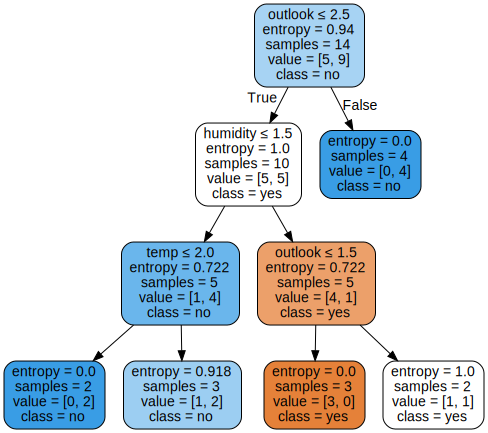

In [6]:
from sklearn import tree
import graphviz # 

DATA_FLAG = "play"                                                               # load the play dataset
X, y = datasets[DATA_FLAG]['X'], datasets[DATA_FLAG]['y'] 

# outlook
X[np.where(X=='rainy')[0], 0] = 2 # , {'normal', 'high'}, {False, True}
X[np.where(X=='sunny')[0], 0] = 1
X[np.where(X=='overcast')[0], 0] = 3

# temp
X[np.where(X=='mild')[0], 1] = 1
X[np.where(X=='hot')[0], 1] = 2
X[np.where(X=='cool')[0], 1] = 3

# humidity  
X[np.where(X=='normal')[0], 2] = 1
X[np.where(X=='high')[0], 2] = 2

# windy   
X[np.where(X==False)[0], 3] = 1
X[np.where(X==True)[0], 3] = 2


criterion = "entropy"                                                            # “entropy” for the information gain
max_depth = 3
min_samples_split = 2

DT = tree.DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, 
                                 min_samples_split=min_samples_split)
DT.fit(X, y)

dot_data = tree.export_graphviz(DT, out_file=None,                               # graphviz export of the above tree trained on the play.csv
                                feature_names=datasets[DATA_FLAG]['feature_names'],  
                                class_names=datasets[DATA_FLAG]['target_names'],  
                                filled=True, rounded=True,  
                                special_characters=True)  

graph = graphviz.Source(dot_data) 
graph

# DATA_FLAG = "iris"   


###Learn a decision tree classifier to classify [iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris) 
 ***Args:***   

*   ***DATA_FLAG***:  *flag to toggle datasets, e.g."iris","mnist",  (default: "iris")* 
*   ***criterion:***  *The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain, (default: "gini")* 
*   ***max_depth:*** *The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.,(default=None)*      
*   ***min_samples_split:*** *The minimum number of samples required to split an internal node,(default=2)*    

***Output:***   
*   ![alt text](https://www.dropbox.com/s/515wgtat7s04k5x/DT_iris.png?raw=1)

In [ ]:
from sklearn import tree
import graphviz # 

DATA_FLAG = "iris"                                                               # load the iris dataset
X, y = datasets[DATA_FLAG]['X'], datasets[DATA_FLAG]['y'] 

criterion = "entropy"                                                            # “entropy” for the information gain
max_depth = None
min_samples_split = 2

DT = tree.DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, 
                                 min_samples_split=min_samples_split)            # construct a tree as follows

DT.fit(X, y)


dot_data = tree.export_graphviz(DT, out_file=None,                               # graphviz export of the above tree trained on the entire iris dataset
                                feature_names=datasets[DATA_FLAG]['feature_names'],  
                                class_names=datasets[DATA_FLAG]['target_names'],  
                                filled=True, rounded=True,  
                                special_characters=True)  

graph = graphviz.Source(dot_data) 
# graph.render("iris") 
graph

##1.5 - Support Vector Machines (SVM)

###Learn a SVM classifier to classify [iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris)   

 
 ***Args:***     
 
*   ***DATA_FLAG***:  *flag to toggle datasets, e.g."iris","mnist",  (default: "iris")* 
*   ***C:***  *Penalty parameter C of the error term., (default=1.0)* 
*   ***kernel:*** *Specifies the kernel type to be used in the algorithm. e.g. ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’,(default=’rbf’)*      
*   ***tol:*** *Tolerance for stopping criterio.,(default=1e-3)*    




***Output:***   
* *SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.0001, verbose=False)*


In [ ]:
from sklearn.svm import LinearSVC, SVC

DATA_FLAG = "iris"
X, y = datasets[DATA_FLAG]['X'], datasets[DATA_FLAG]['y']                       
X, y = X[y < 2][:, :2], y[y < 2]                                                 # use only data labeled as 0 or 1s for binary classification

C = 1000
kernel='linear'
tol=1e-4

SVM = SVC(kernel=kernel, tol=tol, C=C)                                           # train a binary SVM classifier
SVM.fit(X, y)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.0001, verbose=False)

###Visulize the SVM maximum margin separating hyperplane on iris data   
** *Output:* **     
![alt text](https://www.dropbox.com/s/mli4z6xoz9geqjv/svm_iris.png?raw=1)

Text(0.5, 1.0, "SVM binary classification (C = 1000, kernel = 'linear', tol = '0.000100')")

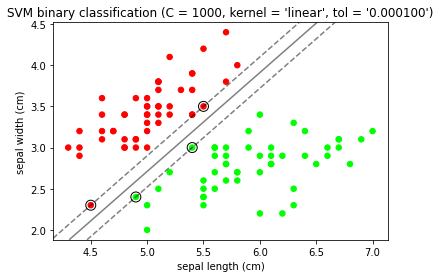

In [ ]:
from matplotlib.colors import ListedColormap
# cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap_bold)

ax = plt.gca()                                                                  
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)                                           # create grid to evaluate model
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z = SVM.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,                  # plot decision boundary and margins
           linestyles=['--', '-', '--'])

ax.scatter(SVM.support_vectors_[:, 0],  SVM.support_vectors_[:, 1], s=100,        # plot support vectors
           linewidth=1, facecolors='none', edgecolors='k')

plt.xlabel(datasets[DATA_FLAG]['feature_names'][0])
plt.ylabel(datasets[DATA_FLAG]['feature_names'][1])
plt.title("SVM binary classification (C = %d, kernel = '%s', tol = '%f')"
          % (C, kernel, tol)) 

##1.6 - Multi-layer Perceptron (MLP) 


###Learn a MLP classifier to classify [iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris)   

 
 ***Args:***     
 
*   ***DATA_FLAG***:  *flag to toggle datasets, e.g."iris","mnist",  (default: "iris")* 
*   ***test_size:***  *If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split, (default=0.25)* 
*   ***hidden_layer_sizes:*** *The ith element represents the number of neurons in the ith hidden layer.default (100,)*      
*   ***activation:*** *Activation function for the hidden layer e.g. ‘identity’, ‘logistic’, ‘tanh’, ‘relu’,( default ‘relu’)*    
*   ***solver:*** *The solver for weight optimization.e.g. ‘lbfgs’, ‘sgd’, ‘adam’,( default ‘adam’)*    
*   ***learning_rate_init:*** *The initial learning rate used. It controls the step-size in updating the weights. Only used when solver=’sgd’ or ‘adam’.,( default 0.001)*    
*   ***alpha:*** *L2 penalty (regularization term) parameter.,( default 0.0001)*    
*   ***max_iter:*** *Maximum number of iterations.,( default 200)*    
*   ***tol:*** *Tolerance for stopping criterio.,(default=1e-4)*     
*   ***verbose:*** *Whether to print progress messages to stdout.,(default=False)*    




***Output:***   
*  *Training set score: 0.964286*  
*  *Test set score: 0.973684*

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split


DATA_FLAG = "iris"
test_size = 0.25

X, y = datasets[DATA_FLAG]['X'], datasets[DATA_FLAG]['y'] 

X_normed = X / X.max(axis=0)                                                     # normalize the features values to [0, 1]


X_train, X_test, y_train, y_test = train_test_split(X_normed, y,                 # train/test split
                                          test_size = test_size, random_state=1)


hidden_layer_sizes=(50, 50)
activation = "relu"
solver='sgd'
learning_rate_init = 0.01
alpha = 1e-4
max_iter=100
tol=1e-4
verbose=100


mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation=activation,
                    max_iter=max_iter, alpha=alpha,
                    solver=solver, verbose=10, tol=tol, random_state=1,
                    learning_rate_init=learning_rate_init)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))


Iteration 1, loss = 1.10582878
Iteration 2, loss = 1.09924937
Iteration 3, loss = 1.09066313
Iteration 4, loss = 1.08064931
Iteration 5, loss = 1.06967807
Iteration 6, loss = 1.05819789
Iteration 7, loss = 1.04681464
Iteration 8, loss = 1.03664791
Iteration 9, loss = 1.02741173
Iteration 10, loss = 1.01801562
Iteration 11, loss = 1.00781613
Iteration 12, loss = 0.99646433
Iteration 13, loss = 0.98381980
Iteration 14, loss = 0.97011643
Iteration 15, loss = 0.95646974
Iteration 16, loss = 0.94464425
Iteration 17, loss = 0.93355994
Iteration 18, loss = 0.92223491
Iteration 19, loss = 0.91039301
Iteration 20, loss = 0.89799816
Iteration 21, loss = 0.88529694
Iteration 22, loss = 0.87236842
Iteration 23, loss = 0.85938071
Iteration 24, loss = 0.84660959
Iteration 25, loss = 0.83382765
Iteration 26, loss = 0.82101047
Iteration 27, loss = 0.80834102
Iteration 28, loss = 0.79579759
Iteration 29, loss = 0.78341463
Iteration 30, loss = 0.77119902
Iteration 31, loss = 0.75913391
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


#Section 2 - Performance Measures


##2.1 - Confusion Matrix
###Example of [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) to evaluate the prediction of the SVM on the [iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris)   

 ** *Args:* **     
 
*   ** *DATA_FLAG* **:  *flag to toggle datasets, e.g."iris","mnist",  (default: "iris")* 
*   ** *test_size:* **  *If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split, (default=0.25)*   
*   ** *C:* **  *Penalty parameter C of the error term., (default=1.0)* 
*   ** *kernel:* ** *Specifies the kernel type to be used in the algorithm. e.g. ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’,(default=’rbf’) *      
*   ** *tol:* ** *Tolerance for stopping criterio.,(default=1e-3) *    


** *Output:* **    
![alt text](https://www.dropbox.com/s/r7ze2qbxhesdxhg/cnf_matrix.png?raw=1)


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.grid(None)

Confusion matrix, without normalization
[[13  0  0]
 [ 0 16  0]
 [ 0  2  7]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   1.   0.  ]
 [0.   0.22 0.78]]


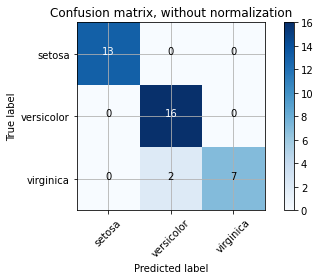

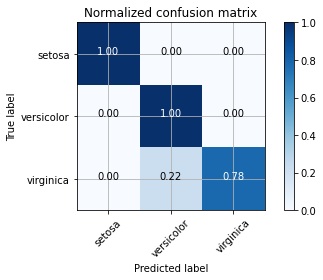

In [ ]:
import itertools
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

DATA_FLAG = "iris"
test_size = 0.25
kernel='linear'
tol=1e-4
C=0.006

X, y = datasets[DATA_FLAG]['X'], datasets[DATA_FLAG]['y'] 
class_names =  datasets[DATA_FLAG]['target_names']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                             test_size = test_size, random_state=1)   # Split the data into a training set and a test set


SVM = svm.SVC(kernel=kernel, tol=tol, C=C, class_weight='balanced')               # Run the svm classifier that is too regularized (C too low) to see the impact on the results
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)


cnf_matrix = confusion_matrix(y_test, y_pred)                                     # Compute confusion matrix
np.set_printoptions(precision=2)


plt.figure()                                      
plot_confusion_matrix(cnf_matrix, classes=class_names,                           # Plot non-normalized confusion matrix
                      title='Confusion matrix, without normalization')


plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,           # Plot normalized confusion matrix
                      title='Normalized confusion matrix')

# plt.show()
plt.savefig("cnf_matrix.png")
# files.download("cnf_matrix.png")

##2.2 - Precision and Recall  
###Compute the [average precision (AP)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html)  

###Example of Precision-Recall curve to evaluate the prediction of the SVM on the [iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris)   

 ** *Args:* **     
 
*   ** *DATA_FLAG* **:  *flag to toggle datasets, e.g."iris","mnist",  (default: "iris")* 
*   ** *test_size:* **  *If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split, (default=0.25)*   

** *Output:* **    


*   *Average precision-recall score: 0.89*
*   ![alt text](https://www.dropbox.com/s/6niriu3g3rwi926/pr_curve.png?raw=1)




Average precision-recall score: 0.89


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.89')

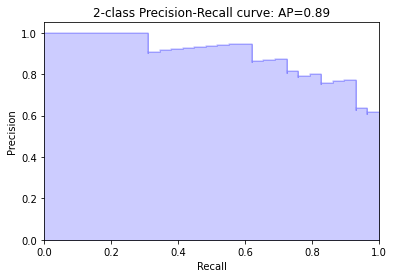

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
# from sklearn.utils.fixes import signature (deprecated)
from inspect import signature
random_state = np.random.RandomState(1)

DATA_FLAG = "iris"
test_size=.5


X, y = datasets[DATA_FLAG]['X'], datasets[DATA_FLAG]['y'] 
n_samples, n_features = X.shape

X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]                    # Add 800 noisy features


# Try decreasing the portion of test_size (increase the size of training set)
X_train, X_test, y_train, y_test = train_test_split(X[y < 2], y[y < 2],          # Limit to the two first classes, and split into training and test
                                                    test_size=test_size,
                                                    random_state=random_state)

SVM = svm.LinearSVC(random_state=random_state)
SVM.fit(X_train, y_train)
y_score = SVM.decision_function(X_test)


average_precision = average_precision_score(y_test, y_score)                     # compute the average precision
print('Average precision-recall score: {0:0.2f}'.format(average_precision))


precision, recall, _ = precision_recall_curve(y_test, y_score)                   # plot the precision-recall curve


step_kwargs = ({'step': 'post'}                                                  # In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

##2.3 - Receiver Operating Characteristic (ROC) with [cross validation](https://scikit-learn.org/stable/modules/cross_validation.html)  
###Example of ROC curve to evaluate the prediction of the SVM on the [iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris)   


 ** *Args:* **     
 
*   ** *DATA_FLAG* **:  *flag to toggle datasets, e.g."iris","mnist",  (default: "iris")* 
*   ** *n_splits:* **  *Number of folds. Must be at least 2., (default=3)*   

** *Output:* **    



*   ![alt text](https://www.dropbox.com/s/06xctlnaqg16fjo/roc_curve.png?raw=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.interp is deprecated and will be removed in 

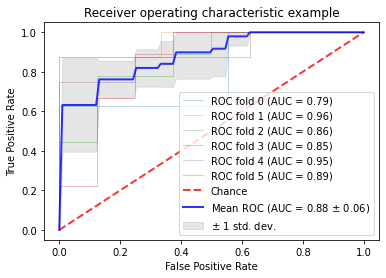

In [ ]:
from numpy import interp
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

DATA_FLAG = "iris"
n_splits=6

random_state = np.random.RandomState(1)

X, y = datasets[DATA_FLAG]['X'], datasets[DATA_FLAG]['y'] 
X, y = X[y != 2], y[y != 2]

n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]                    # Add 800 noisy features

# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=n_splits)                                          # K-Folds cross-validator
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
# plt.show()
